In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os,random,shutil
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D,add
import keras
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
import soundfile
from tensorflow import keras
from tensorflow.keras import layers

#Data Loading

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 96% 414M/429M [00:01<00:00, 292MB/s]
100% 429M/429M [00:01<00:00, 274MB/s]


In [ ]:
os.makedirs("/content/Happy")
os.makedirs("/content/Sad")
os.makedirs("/content/input")

name = ('03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-04-02-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-04-02-02-02')


In [ ]:
!unzip -qq ravdess-emotional-speech-audio.zip -d input

#Data Preprocessing

In [ ]:
i = 1
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        if filename.startswith(name):
            i = i+1
            if filename.startswith(("03-01-03")):
                shutil.copy(os.path.join(dirname, filename),"/content/Happy/")
            else:
                shutil.copy(os.path.join(dirname, filename),"/content/Sad/")
            
print("Count = ",i)

Count =  769


In [ ]:
i = 0
mfcc_happy = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64)
                mean = np.mean((mfccs).T,axis = 0)
                mfcc_happy.append(mean)
                i = i+1
                if i == 250:
                    break
        

/content/
/content/.config
/content/.config/logs
/content/.config/logs/2022.10.27
/content/.config/configurations
/content/Sad
/content/Happy
/content/input
/content/input/Actor_03
/content/input/Actor_12
/content/input/Actor_04
/content/input/Actor_21
/content/input/Actor_07
/content/input/Actor_01
/content/input/Actor_06
/content/input/Actor_02
/content/input/audio_speech_actors_01-24
/content/input/audio_speech_actors_01-24/Actor_03
/content/input/audio_speech_actors_01-24/Actor_12
/content/input/audio_speech_actors_01-24/Actor_04
/content/input/audio_speech_actors_01-24/Actor_21
/content/input/audio_speech_actors_01-24/Actor_07
/content/input/audio_speech_actors_01-24/Actor_01
/content/input/audio_speech_actors_01-24/Actor_06
/content/input/audio_speech_actors_01-24/Actor_02
/content/input/audio_speech_actors_01-24/Actor_17
/content/input/audio_speech_actors_01-24/Actor_15
/content/input/audio_speech_actors_01-24/Actor_23
/content/input/audio_speech_actors_01-24/Actor_13
/content/i

In [ ]:
i = 0
melspec_happy = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=64)
                mean = np.mean((mel).T,axis = 0)
                melspec_happy.append(mean)
                i = i+1
                if i == 250:
                    break

/content/
/content/.config
/content/.config/logs
/content/.config/logs/2022.10.27
/content/.config/configurations
/content/Sad
/content/Happy
/content/input
/content/input/Actor_03
/content/input/Actor_12
/content/input/Actor_04
/content/input/Actor_21
/content/input/Actor_07
/content/input/Actor_01
/content/input/Actor_06
/content/input/Actor_02
/content/input/audio_speech_actors_01-24
/content/input/audio_speech_actors_01-24/Actor_03
/content/input/audio_speech_actors_01-24/Actor_12
/content/input/audio_speech_actors_01-24/Actor_04
/content/input/audio_speech_actors_01-24/Actor_21
/content/input/audio_speech_actors_01-24/Actor_07
/content/input/audio_speech_actors_01-24/Actor_01
/content/input/audio_speech_actors_01-24/Actor_06
/content/input/audio_speech_actors_01-24/Actor_02
/content/input/audio_speech_actors_01-24/Actor_17
/content/input/audio_speech_actors_01-24/Actor_15
/content/input/audio_speech_actors_01-24/Actor_23
/content/input/audio_speech_actors_01-24/Actor_13
/content/i

In [ ]:
i = 0
mfcc_sad = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64)
                mean = np.mean((mfccs).T,axis = 0)
                mfcc_sad.append(mean)
                i = i+1
                if i == 250:
                    break

/content/
/content/.config
/content/.config/logs
/content/.config/logs/2022.10.27
/content/.config/configurations
/content/Sad
/content/Happy
/content/input
/content/input/Actor_03
/content/input/Actor_12
/content/input/Actor_04
/content/input/Actor_21
/content/input/Actor_07
/content/input/Actor_01
/content/input/Actor_06
/content/input/Actor_02
/content/input/audio_speech_actors_01-24
/content/input/audio_speech_actors_01-24/Actor_03
/content/input/audio_speech_actors_01-24/Actor_12
/content/input/audio_speech_actors_01-24/Actor_04
/content/input/audio_speech_actors_01-24/Actor_21
/content/input/audio_speech_actors_01-24/Actor_07
/content/input/audio_speech_actors_01-24/Actor_01
/content/input/audio_speech_actors_01-24/Actor_06
/content/input/audio_speech_actors_01-24/Actor_02
/content/input/audio_speech_actors_01-24/Actor_17
/content/input/audio_speech_actors_01-24/Actor_15
/content/input/audio_speech_actors_01-24/Actor_23
/content/input/audio_speech_actors_01-24/Actor_13
/content/i

In [ ]:
i = 0
melspec_sad = []
for dirname, _, filenames in os.walk('/content/'):
    print(dirname)
    if dirname == "/content/Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
        
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=64)
                mean = np.mean((mel).T,axis = 0)
                melspec_sad.append(mean)
                i = i+1
                if i == 250:
                    break

/content/
/content/.config
/content/.config/logs
/content/.config/logs/2022.10.27
/content/.config/configurations
/content/Sad
/content/Happy
/content/input
/content/input/Actor_03
/content/input/Actor_12
/content/input/Actor_04
/content/input/Actor_21
/content/input/Actor_07
/content/input/Actor_01
/content/input/Actor_06
/content/input/Actor_02
/content/input/audio_speech_actors_01-24
/content/input/audio_speech_actors_01-24/Actor_03
/content/input/audio_speech_actors_01-24/Actor_12
/content/input/audio_speech_actors_01-24/Actor_04
/content/input/audio_speech_actors_01-24/Actor_21
/content/input/audio_speech_actors_01-24/Actor_07
/content/input/audio_speech_actors_01-24/Actor_01
/content/input/audio_speech_actors_01-24/Actor_06
/content/input/audio_speech_actors_01-24/Actor_02
/content/input/audio_speech_actors_01-24/Actor_17
/content/input/audio_speech_actors_01-24/Actor_15
/content/input/audio_speech_actors_01-24/Actor_23
/content/input/audio_speech_actors_01-24/Actor_13
/content/i

In [ ]:
happy_features = pd.DataFrame(mfcc_happy,columns=range(1,65))
happy_features["Category"] = "Happy"
sad_features = pd.DataFrame(mfcc_sad,columns=range(1,65))
sad_features["Category"] = "Sad"

In [ ]:
mfccdf = happy_features.append(sad_features)
mfccdf.to_csv("Mfcc.csv",index=False)

In [ ]:
mel_happy = pd.DataFrame(melspec_happy,columns=range(1,65))
mel_happy["Category"] = "Happy"
mel_sad = pd.DataFrame(melspec_sad,columns=range(1,65))
mel_sad["Category"] = "Sad"

In [ ]:
mel_df = mel_happy.append(mel_sad)

In [ ]:
mel_df.to_csv("Mel.csv",index=False)

# Logistic Regression Model
### Features Used : MFCC

In [ ]:
def L_Reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    lr = LogisticRegression()
    lr.fit(X_train_scale,y_train)
    y_train_pred = lr.predict(X_train_scale)
    y_test_pred = lr.predict(X_test_scale)
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred)*100,"%")
    print("Validation/Test Accuracy = ",accuracy_score(y_test,y_test_pred)*100,"%")

In [ ]:
mfccdf["Category"] = mfccdf["Category"].replace({'Happy':1,'Sad':0})
X = mfccdf.iloc[:,0:64]
y = mfccdf["Category"]

In [ ]:
L_Reg(X,y)

Training Accuracy =  56.67752442996743 %
Validation/Test Accuracy =  23.376623376623375 %


### Features Used: Mel Spectrogram

In [ ]:
mel_df["Category"] = mel_df["Category"].replace({"Happy": 1,"Sad": 0})
X = mel_df.iloc[:,:-1]
y = mel_df.iloc[:,-1:]

In [ ]:
L_Reg(X,y)

Training Accuracy =  75.8957654723127 %
Validation/Test Accuracy =  71.42857142857143 %


**Result**: Logistic Regression using Mel Spectrogram Features Give Better Accuracy

# CNN Model

### Features Used : MFCC

In [ ]:
X = mfccdf.iloc[:,0:64]
y = mfccdf["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0],16,4,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,4,1)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 4 , 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 4, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 2, 16)          1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.8623 - accuracy: 0.5081 - val_loss: 0.7752 - val_accuracy: 0.5065
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7304 - accuracy: 0.4984 - val_loss: 0.7629 - val_accuracy: 0.3766
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7195 - accuracy: 0.5277 - val_loss: 0.7602 - val_accuracy: 0.3506
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7114 - accuracy: 0.5212 - val_loss: 0.7816 - val_accuracy: 0.3506
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7051 - accuracy: 0.5309 - val_loss: 0.7978 - val_accuracy: 0.3636
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7046 - accuracy: 0.5212 - val_loss: 0.7828 - val_accuracy: 0.4026
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5179 - val_loss: 0.8061 - val_accuracy: 0.3766
Epoch 8/100


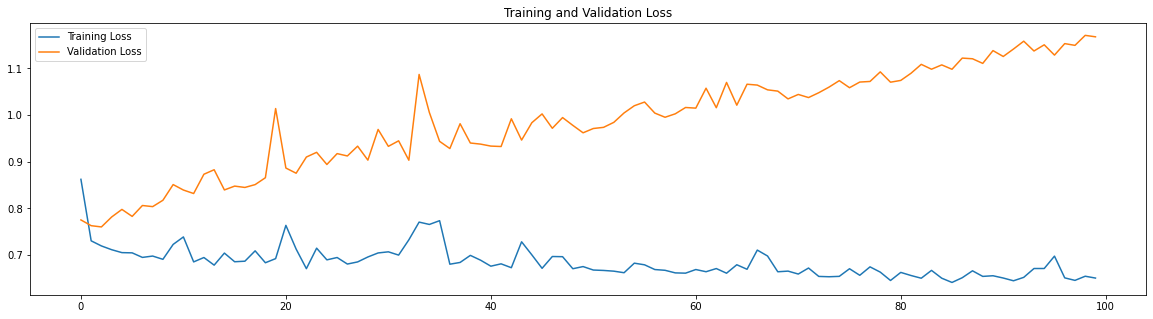

In [ ]:
plt.figure(figsize=(20, 5))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper light')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)
print("Training accuracy = ",accuracy_score(y_train,y_train_pred)*100,"%")
print("Validation accuracy = ",accuracy_score(y_test,y_test_pred)*100,"%")

3/3 [==============================] - 0s 3ms/step
Training accuracy =  59.28338762214984 %
Validation accuracy =  12.987012987012985 %


### Features Used : Mel Spectogram

In [ ]:
X = mel_df.iloc[:,0:64]
y = mel_df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0],16,4,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,4,1)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history_mel = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6809 - accuracy: 0.5765 - val_loss: 0.6581 - val_accuracy: 0.6753
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.6515 - val_loss: 0.6383 - val_accuracy: 0.6883
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.6808 - val_loss: 0.6201 - val_accuracy: 0.7532
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.6938 - val_loss: 0.6088 - val_accuracy: 0.7532
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.6873 - val_loss: 0.6012 - val_accuracy: 0.7532
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6312 - accuracy: 0.6710 - val_loss: 0.5937 - val_accuracy: 0.7532
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6257 - accuracy: 0.6710 - val_loss: 0.5878 - val_accuracy: 0.7273
Epoch 8/100


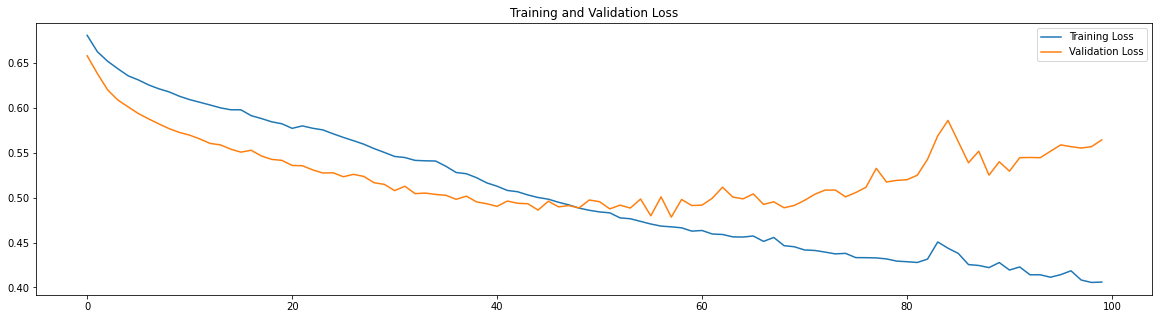

In [ ]:
plt.figure(figsize=(20, 5))
loss = history_mel.history['loss']
val_loss = history_mel.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)

3/3 [==============================] - 0s 8ms/step


In [ ]:
print("Training accuracy = ",accuracy_score(y_train,y_train_pred)*100,'%')
print("Valiation/Test accuracy = ",accuracy_score(y_test,y_test_pred)*100,'%')

Training accuracy =  80.78175895765473 %
Valiation/Test accuracy =  74.02597402597402 %


**Result**: Mel Spctrogram Features Give better classification accuracy in CNN Model

# Auto Encoders

## Pre Processing 

In [ ]:
happys = []
sads = []
i = 0
l_happy = []
for dirname, _, filenames in os.walk('/content/'):
    if dirname == "/content/Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                happys.append(filename)
    if dirname == "/content/Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                sads.append(filename)
                

In [ ]:
happy = []
sad = []
for i in happys:
    for j in sads:
        
        x = i[:-4]
        y = j[:-4]
        split_x = x.split('-') 
        split_y = y.split('-')
        
        
        
        if ((split_x[-1] == split_y[-1])and (split_x[-4] == split_y[-4]) and (split_x[-2] == split_y[-2])and (split_x[-3] == split_y[-3])):
            happy.append(i)
            sad.append(j)

In [ ]:
maindf = pd.DataFrame()
maindf["happy"] = happy
maindf["sad"] = sad

In [ ]:
maindf.tail()

,happy,sad
187,03-01-03-02-02-01-12.wav,03-01-04-02-02-01-12.wav
188,03-01-03-02-02-02-13.wav,03-01-04-02-02-02-13.wav
189,03-01-03-01-01-02-12.wav,03-01-04-01-01-02-12.wav
190,03-01-03-01-02-01-21.wav,03-01-04-01-02-01-21.wav
191,03-01-03-01-01-02-22.wav,03-01-04-01-01-02-22.wav


In [ ]:
maindf["happy"] = '/content/Happy/' + maindf["happy"]
maindf["sad"] = '/content/Sad/' + maindf["sad"]

In [ ]:
maindf.tail()

,happy,sad
187,/content/Happy/03-01-03-02-02-01-12.wav,/content/Sad/03-01-04-02-02-01-12.wav
188,/content/Happy/03-01-03-02-02-02-13.wav,/content/Sad/03-01-04-02-02-02-13.wav
189,/content/Happy/03-01-03-01-01-02-12.wav,/content/Sad/03-01-04-01-01-02-12.wav
190,/content/Happy/03-01-03-01-02-01-21.wav,/content/Sad/03-01-04-01-02-01-21.wav
191,/content/Happy/03-01-03-01-01-02-22.wav,/content/Sad/03-01-04-01-01-02-22.wav


In [ ]:
train, test = train_test_split(maindf, test_size=0.30)

In [ ]:
file_count = 0
train_hf = []
for count_, path in zip(range(train.shape[0]), train['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_hf.append(mfcc_t)
    count_ += 1

In [ ]:
train_sf = []
for count_, path in zip(range(train.shape[0]), train['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    train_sf.append(mfcc_t)
    count_ += 1

In [ ]:
file_count = 0
test_hf = []
for count_, path in zip(range(test.shape[0]), test['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_hf.append(mfcc_t)
    count_ += 1

file_count = 0
test_sf = []
for count_, path in zip(range(test.shape[0]), test['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_sf.append(mfcc_t)
    count_ += 1

In [ ]:
print(np.array(test_hf).shape,np.array(test_sf).shape)
print(np.array(train_hf).shape,np.array(train_sf).shape)

(58, 256, 20) (58, 256, 20)
(134, 256, 20) (134, 256, 20)


In [ ]:
train_hf = np.array(train_hf).reshape(134,256,20,1)
train_sf = np.array(train_sf).reshape(134,256,20,1)
test_hf = np.array(test_hf).reshape(58,256,20,1)
test_sf = np.array(test_sf).reshape(58,256,20,1)

### Autoencoder Model

In [ ]:
tf.keras.backend.clear_session()
class AE_Audio(tf.keras.models.Model):
    def __init__(self):
        super(AE_Audio, self).__init__()
        self.encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(256, 20, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2)])

        self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AE_Audio()

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(train_hf, train_sf, epochs=10,validation_data = (test_hf,test_sf))

Epoch 1/10
5/5 [==============================] - 3s 301ms/step - loss: -1741.0889 - val_loss: -15938.1504
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: -52733.0664 - val_loss: -239828.8594
Epoch 3/10
5/5 [==============================] - 0s 44ms/step - loss: -578868.5625 - val_loss: -1934983.7500
Epoch 4/10
5/5 [==============================] - 0s 43ms/step - loss: -3950291.5000 - val_loss: -10874637.0000
Epoch 5/10
5/5 [==============================] - 0s 44ms/step - loss: -19735214.0000 - val_loss: -48097544.0000
Epoch 6/10
5/5 [==============================] - 0s 42ms/step - loss: -81264416.0000 - val_loss: -177953008.0000
Epoch 7/10
5/5 [==============================] - 0s 42ms/step - loss: -282126208.0000 - val_loss: -573056448.0000
Epoch 8/10
5/5 [==============================] - 0s 45ms/step - loss: -865427328.0000 - val_loss: -1652498944.0000
Epoch 9/10
5/5 [==============================] - 0s 45ms/step - loss: -2411715072.0000 - val_loss: -4338

In [ ]:
sample = np.array(test_hf[0]).reshape(1,256,20,1)
es = autoencoder.encoder(sample).numpy()
ds = autoencoder.decoder(es).numpy()

In [ ]:
mfcc_test_Sample = librosa.feature.inverse.mfcc_to_audio(ds.reshape(256, 20))
soundfile.write('example.wav', mfcc_test_Sample, 20000)

In [ ]:
ipd.Audio('example.wav')

**Result**: Simple Autoencoder shows an exponential increase in loss which is because the autoencoder is unable to map the features properly

#Variational Autoencoder

In [ ]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 2
encoder_inputs = keras.Input(shape=(256, 20, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 20, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 10, 32)  320         ['input_2[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 5, 64)    18496       ['conv2d_6[0][0]']               
                                                                                                  
 flatten (Flatten)              (None, 20480)        0           ['conv2d_7[0][0]']         

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64 * 5 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((64, 5, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 20480)             61440     
                                                                 
 reshape (Reshape)           (None, 64, 5, 64)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 128, 10, 64)      36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 256, 20, 32)      18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 256, 20, 1)       289 

In [ ]:
class VarAutoEnc(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VarAutoEnc, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
vae = VarAutoEnc(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [ ]:
history = vae.fit(train_hf,
                   epochs=10)

Epoch 1/10
5/5 [==============================] - 2s 40ms/step - loss: 4091.1602 - reconstruction_loss: 2559.3176 - kl_loss: 222.4673
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: -20056.7850 - reconstruction_loss: -36305.3867 - kl_loss: 2235.5852
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: -343400.0521 - reconstruction_loss: -572274.0000 - kl_loss: 45018.0000
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: -3133866.6458 - reconstruction_loss: -4897400.0000 - kl_loss: 408380.3438
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: -21837840.1667 - reconstruction_loss: -32313942.0000 - kl_loss: 2586151.5000
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: -122444389.3333 - reconstruction_loss: -173610272.0000 - kl_loss: 12447908.0000
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: -571453418.6667 - reconstruction_loss: -773242944.0000 - kl_loss: 4775

In [ ]:
sample = np.array(test_hf[0]).reshape(1,256,20,1)
z_mean, z_log_var, z = vae.encoder(sample)
ds = vae.decoder(z).numpy()

In [ ]:
mfcc_test = librosa.feature.inverse.mfcc_to_audio(ds.reshape(256, 20))
soundfile.write('example1.wav', mfcc_test, 20000)

In [ ]:

ipd.Audio('example1.wav')

**Result**:Variational Autoencoder shows an exponential increase in loss which is because the features are not being mapped properly